In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## All the independent columns are in object, they are need to be converted into numeric type. I am going to handle one columns at one time.

In [219]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

In [220]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [222]:
df['Date'] = df['Date'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['year'] = df['year'].astype('int64')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [224]:
df.drop('Date_of_Journey', axis = 1, inplace=True)

In [225]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [226]:
df.drop('Airline', axis = 1, inplace=True)

In [227]:
df['Dep_Hour'] = df['Dep_Time'].str.split(":").str[0].astype("int64")
df['Dep_Min'] = df['Dep_Time'].str.split(":").str[1].astype("int64")

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10683 non-null  object
 1   Destination      10683 non-null  object
 2   Route            10682 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  year             10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Min          10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [229]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [230]:
df.head()

,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_Hour,Dep_Min
0,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [231]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(":").str[0].astype("int64")

In [232]:
df['Arrival_mintues'] = df['Arrival_Time'].str.split(":").str[1].str.split(" ").str[0].astype("int64")

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10683 non-null  object
 1   Destination      10683 non-null  object
 2   Route            10682 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  year             10683 non-null  int64 
 11  Dep_Hour         10683 non-null  int64 
 12  Dep_Min          10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  int64 
 14  Arrival_mintues  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [234]:
df.drop("Arrival_Time", axis = 1, inplace = True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10683 non-null  object
 1   Destination      10683 non-null  object
 2   Route            10682 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   year             10683 non-null  int64 
 10  Dep_Hour         10683 non-null  int64 
 11  Dep_Min          10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_mintues  10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [236]:
df.drop("Route", axis = 1, inplace = True)

In [237]:
df['Total_Stops'] = df['Total_Stops'].map({"non-stop" : 0, "1 stop":1, "2 stops" : 2, "3 stops": 3, "4 stops" : 4, np.nan : 1})

In [238]:
df.head(2)

,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_mintues
0,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,5,50,13,15


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10683 non-null  object
 1   Destination      10683 non-null  object
 2   Duration         10683 non-null  object
 3   Total_Stops      10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int64 
 7   Month            10683 non-null  int64 
 8   year             10683 non-null  int64 
 9   Dep_Hour         10683 non-null  int64 
 10  Dep_Min          10683 non-null  int64 
 11  Arrival_Hour     10683 non-null  int64 
 12  Arrival_mintues  10683 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [240]:
df[df['Duration'] == '5m']

,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_mintues
6474,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,16,50,16,55


In [241]:
df['Duration'].head(2)

,Duration
0,2h 50m
1,7h 25m


In [242]:
df['Duration_hours'] = df['Duration'].str.split("m").str[0].str.split("h").str[0]

In [243]:
df['Duration_mintues'] = df['Duration'].str.split("m").str[0].str.split(" ").str[1]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            10683 non-null  object
 1   Destination       10683 non-null  object
 2   Duration          10683 non-null  object
 3   Total_Stops       10683 non-null  int64 
 4   Additional_Info   10683 non-null  object
 5   Price             10683 non-null  int64 
 6   Date              10683 non-null  int64 
 7   Month             10683 non-null  int64 
 8   year              10683 non-null  int64 
 9   Dep_Hour          10683 non-null  int64 
 10  Dep_Min           10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_mintues   10683 non-null  int64 
 13  Duration_hours    10683 non-null  object
 14  Duration_mintues  9651 non-null   object
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [245]:
## Changing the type of new duration columns
df['Duration_hours'] = df['Duration_hours'].astype("int64")

In [246]:
df['Duration_mintues'] = pd.to_numeric(df['Duration_mintues'], errors='coerce')

In [247]:
df['Duration_mintues'].unique()

array([50., 25., nan, 45., 30.,  5., 15., 35., 10., 20., 55., 40.])

In [248]:
## The Duration_mintues columns has converted into the numeric type. As this column has null values so lets impute them.

<Axes: ylabel='Duration_mintues'>

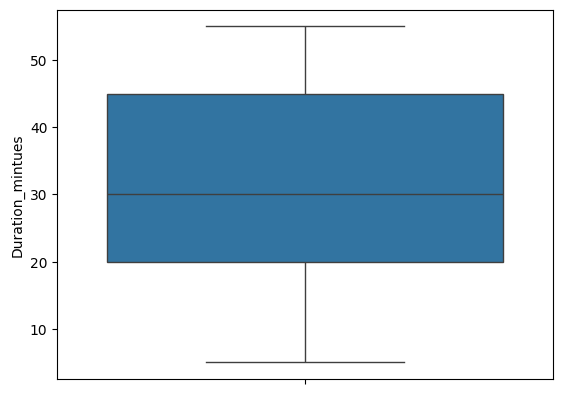

In [249]:
## First lets check does the column contains outlier's or not
sns.boxplot(df['Duration_mintues'])

In [250]:
## No outlier's are present so lets use mean to fill null values.
df['Duration_mintues'] = df['Duration_mintues'].fillna(df['Duration_mintues'].mean())

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Source            10683 non-null  object 
 1   Destination       10683 non-null  object 
 2   Duration          10683 non-null  object 
 3   Total_Stops       10683 non-null  int64  
 4   Additional_Info   10683 non-null  object 
 5   Price             10683 non-null  int64  
 6   Date              10683 non-null  int64  
 7   Month             10683 non-null  int64  
 8   year              10683 non-null  int64  
 9   Dep_Hour          10683 non-null  int64  
 10  Dep_Min           10683 non-null  int64  
 11  Arrival_Hour      10683 non-null  int64  
 12  Arrival_mintues   10683 non-null  int64  
 13  Duration_hours    10683 non-null  int64  
 14  Duration_mintues  10683 non-null  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 1.2+ MB


In [252]:
## As the duration column is handled to we can drop the original one
df.drop("Duration", axis = 1, inplace = True)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Source            10683 non-null  object 
 1   Destination       10683 non-null  object 
 2   Total_Stops       10683 non-null  int64  
 3   Additional_Info   10683 non-null  object 
 4   Price             10683 non-null  int64  
 5   Date              10683 non-null  int64  
 6   Month             10683 non-null  int64  
 7   year              10683 non-null  int64  
 8   Dep_Hour          10683 non-null  int64  
 9   Dep_Min           10683 non-null  int64  
 10  Arrival_Hour      10683 non-null  int64  
 11  Arrival_mintues   10683 non-null  int64  
 12  Duration_hours    10683 non-null  int64  
 13  Duration_mintues  10683 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 1.1+ MB


In [254]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Source', 'Destination', 'Additional_Info'], dtype='object')

In [255]:
for i in range(len(cat_cols)):
    print(df[cat_cols[i]].value_counts())
    print()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64



In [256]:
## Applying one-hot encoding on the source, destination coulmn and label encoding on the add_info column.

In [257]:
## Spliting the data to avoid data leakage
X = df.drop('Price', axis = 1)
y = df['Price']

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Label Encoding for 'Additional_Info'
le = LabelEncoder()
X_train['Additional_Info'] = le.fit_transform(X_train['Additional_Info'])
X_test['Additional_Info'] = le.transform(X_test['Additional_Info'])

# OneHotEncoding for 'Source' and 'Destination'
cat_cols_ = ["Source", "Destination"]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform on training data
encoded_train_array = encoder.fit_transform(X_train[cat_cols_])
encoded_train_df = pd.DataFrame(encoded_train_array,
                                 columns=encoder.get_feature_names_out(cat_cols_),
                                 index=X_train.index)

# Transform test data
encoded_test_array = encoder.transform(X_test[cat_cols_])
encoded_test_df = pd.DataFrame(encoded_test_array,
                                columns=encoder.get_feature_names_out(cat_cols_),
                                index=X_test.index)

# Drop original categorical columns and concat encoded columns
X_train = pd.concat([X_train.drop(columns=cat_cols_), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_cols_), encoded_test_df], axis=1)


In [259]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7478 entries, 749 to 7270
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Stops            7478 non-null   int64  
 1   Additional_Info        7478 non-null   int64  
 2   Date                   7478 non-null   int64  
 3   Month                  7478 non-null   int64  
 4   year                   7478 non-null   int64  
 5   Dep_Hour               7478 non-null   int64  
 6   Dep_Min                7478 non-null   int64  
 7   Arrival_Hour           7478 non-null   int64  
 8   Arrival_mintues        7478 non-null   int64  
 9   Duration_hours         7478 non-null   int64  
 10  Duration_mintues       7478 non-null   float64
 11  Source_Banglore        7478 non-null   float64
 12  Source_Chennai         7478 non-null   float64
 13  Source_Delhi           7478 non-null   float64
 14  Source_Kolkata         7478 non-null   float64
 15  Source_

In [260]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3205 entries, 6076 to 9313
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Stops            3205 non-null   int64  
 1   Additional_Info        3205 non-null   int64  
 2   Date                   3205 non-null   int64  
 3   Month                  3205 non-null   int64  
 4   year                   3205 non-null   int64  
 5   Dep_Hour               3205 non-null   int64  
 6   Dep_Min                3205 non-null   int64  
 7   Arrival_Hour           3205 non-null   int64  
 8   Arrival_mintues        3205 non-null   int64  
 9   Duration_hours         3205 non-null   int64  
 10  Duration_mintues       3205 non-null   float64
 11  Source_Banglore        3205 non-null   float64
 12  Source_Chennai         3205 non-null   float64
 13  Source_Delhi           3205 non-null   float64
 14  Source_Kolkata         3205 non-null   float64
 15  Source

In [261]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Creation

In [262]:
## Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [263]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "SVM" : SVR(),
    "KNN" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random forest" : RandomForestRegressor(),
    "Adaboost" : AdaBoostRegressor(),
    "Gradient boost" : GradientBoostingRegressor(),
    "XGBoost" : XGBRegressor()
}
models

{'LinearRegression': LinearRegression(),
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'SVM': SVR(),
 'KNN': KNeighborsRegressor(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random forest': RandomForestRegressor(),
 'Adaboost': AdaBoostRegressor(),
 'Gradient boost': GradientBoostingRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,


In [264]:
from sklearn.metrics import r2_score, mean_absolute_error

In [265]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    ## getting accuracy
    print(f"{list(models.keys())[i]} train_score = {r2_score(y_train, y_pred_train) * 100}")
    print()
    print(f"{list(models.keys())[i]} test_score = {r2_score(y_test, y_pred_test) * 100}")
    print()
    print(f"{list(models.keys())[i]} mae = {mean_absolute_error(y_test, y_pred_test)}")
    print("-" * 30)

LinearRegression train_score = 43.84813735854477

LinearRegression test_score = 46.3309955434687

LinearRegression mae = 2391.5287332519233
------------------------------
Lasso train_score = 43.84807755626624

Lasso test_score = 46.3332946036902

Lasso mae = 2391.3948674218705
------------------------------
Ridge train_score = 43.84813649793745

Ridge test_score = 46.33108084949665

Ridge mae = 2391.535614310605
------------------------------
SVM train_score = 3.097772373721286

SVM test_score = 3.974535079727737

SVM mae = 3433.516299134681
------------------------------
KNN train_score = 80.59996547228485

KNN test_score = 74.5914840645835

KNN mae = 1398.4658346333854
------------------------------
Decision Tree train_score = 99.06266734672514

Decision Tree test_score = 70.20245616173541

Decision Tree mae = 1001.6029641185647
------------------------------
Random forest train_score = 97.31239010318508

Random forest test_score = 79.90018872461965

Random forest mae = 889.266338725

In [267]:
## XGBoost and KNN preforms well lets hyperparameter tune them
KNN_params = {
    "n_neighbors" : [5,6,7,8,9],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
    "p" : [1,2],
    "n_jobs" : [-1]
}

XGBoost_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [268]:
model_list = [("KNN", KNeighborsRegressor(), KNN_params), ("XGBoost", XGBRegressor(), XGBoost_params)]

In [270]:
from sklearn.model_selection import GridSearchCV
for name, model, params in model_list:
    grid = GridSearchCV(model, param_grid=params, scoring='r2', cv = 5, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    print(f"{name} best params : {grid.best_params_}")

KNN best params : {'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
XGBoost best params : {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}


In [272]:
tuned_models = {
    "KNN" : KNeighborsRegressor(algorithm="kd_tree", n_jobs=-1, n_neighbors = 5, weights = "distance"),
    "XGBoost" : XGBRegressor(learning_rate = 0.1, max_depth = 7, subsample = 0.7)
}

for i in range(len(list(tuned_models))):
    model = list(tuned_models.values())[i]
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    ## getting accuracy
    print(f"{list(tuned_models.keys())[i]} train_score = {r2_score(y_train, y_pred_train) * 100}")
    print()
    print(f"{list(tuned_models.keys())[i]} test_score = {r2_score(y_test, y_pred_test) * 100}")
    print()
    print(f"{list(tuned_models.keys())[i]} mae = {mean_absolute_error(y_test, y_pred_test)}")
    print("-" * 30)

KNN train_score = 99.06266734672514

KNN test_score = 74.90342047900259

KNN mae = 1329.1509844236668
------------------------------
XGBoost train_score = 94.39334869384766

XGBoost test_score = 84.22008156776428

XGBoost mae = 1017.7450561523438
------------------------------


## Conclusion : XGBoost is the best model with a accuracy of 84.22%